In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# **Task 1**

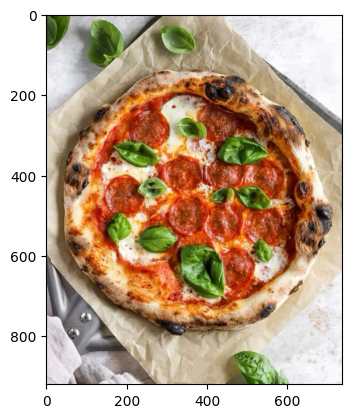

In [4]:
img_pizza = cv2.imread('pizza.jpeg')

# Make a copy of the img_pizza
img_pizza_Copy = np.copy(img_pizza)

# Change color to RGB (from BGR)
img_pizza_copy = cv2.cvtColor(img_pizza_Copy, cv2.COLOR_BGR2RGB)

plt.imshow(img_pizza_copy)

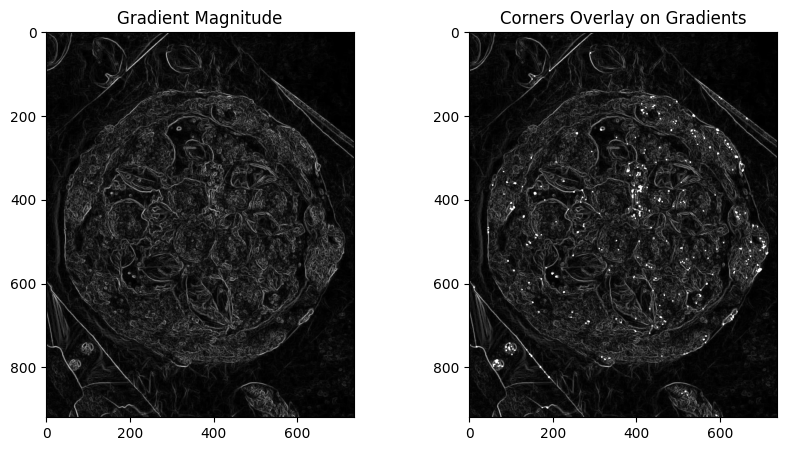

In [5]:
gray = cv2.cvtColor(img_pizza, cv2.COLOR_BGR2GRAY)

# Compute gradients using Sobel operator
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Compute gradient magnitude
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize magnitude for visualization
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)


dst = cv2.cornerHarris(np.float32(gray), 2, 3, 0.01)
dst = cv2.dilate(dst, None)

# Threshold to find strong corners
threshold = 0.08 * dst.max()
corners = dst > threshold

# Create a copy of the gradient magnitude to overlay corners
overlay = np.copy(magnitude)
overlay[corners] = 255  # Highlight corners

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Corners Overlay on Gradients")
plt.imshow(overlay, cmap='gray')
plt.show()

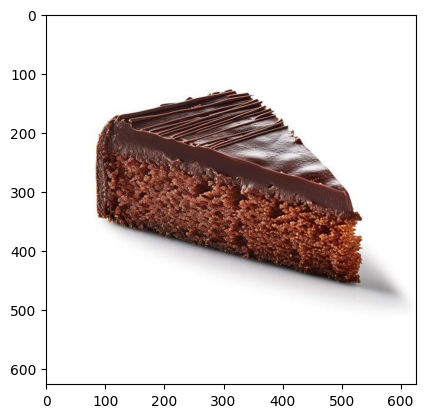

In [6]:
img_cake = cv2.imread('cake.jpeg')

# Make a copy of the img_cake
img_cake_Copy = np.copy(img_cake)

# Change color to RGB (from BGR)
img_cake_copy = cv2.cvtColor(img_cake_Copy, cv2.COLOR_BGR2RGB)

plt.imshow(img_cake_copy)

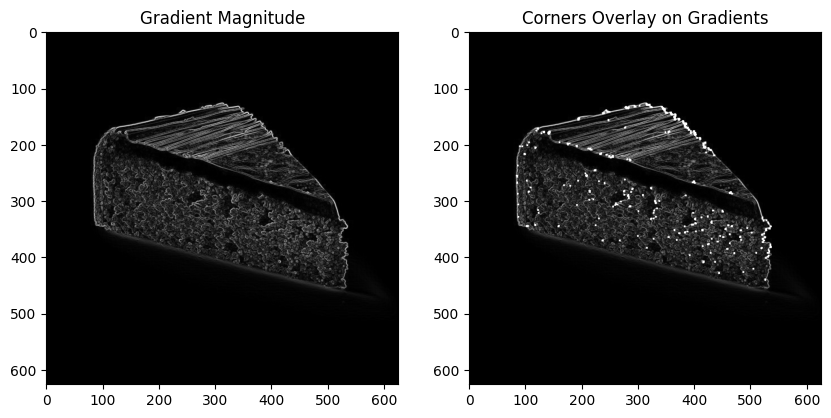

In [7]:
gray = cv2.cvtColor(img_cake, cv2.COLOR_BGR2GRAY)

# Compute gradients using Sobel operator
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Compute gradient magnitude
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize magnitude for visualization
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Detect corners using Harris corner detection
dst = cv2.cornerHarris(np.float32(gray), 2, 3, 0.01)
dst = cv2.dilate(dst, None)

# Threshold to find strong corners
threshold = 0.1 * dst.max()
corners = dst > threshold

# Create a copy of the gradient magnitude to overlay corners
overlay = np.copy(magnitude)
overlay[corners] = 255  # Highlight corners

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Corners Overlay on Gradients")
plt.imshow(overlay, cmap='gray')
plt.show()

**Analysis**

In [8]:
'''Harris Corner Detection struggles with circular shapes because their edges are smooth and don’t have sharp corners.
Irregular textures like cheese or toppings create messy patterns that confuse the algorithm.
Circles are often too symmetrical for it to find distinct corner points.

Replacing the circular shaped Pizza with a triangle-shaped cake piece we can see that,
the Harris corner detection algorithm works better on triangle-shaped cake piece as the edges of a triange is more defined than a circular shaped Pizza.'''

'Harris Corner Detection struggles with circular shapes because their edges are smooth and don’t have sharp corners.\nIrregular textures like cheese or toppings create messy patterns that confuse the algorithm.\nCircles are often too symmetrical for it to find distinct corner points.\n\nReplacing the circular shaped Pizza with a triangle-shaped cake piece we can see that,\nthe Harris corner detection algorithm works better on triangle-shaped cake piece as the edges of a triange is more defined than a circular shaped Pizza.'

# **Task 2**

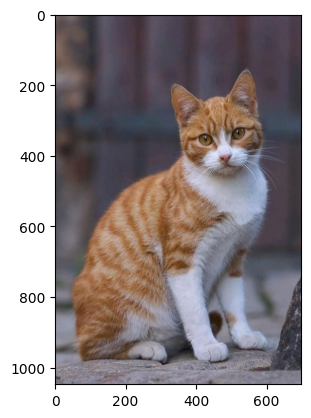

In [9]:
image1 = cv2.imread('cat.jpeg')

# Make a copy of the image1
img_pizza_Copy = np.copy(image1)

# Change color to RGB (from BGR)
img_pizza_copy = cv2.cvtColor(img_pizza_Copy, cv2.COLOR_BGR2RGB)

plt.imshow(img_pizza_copy)

In [26]:
from google.colab.patches import cv2_imshow

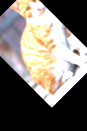

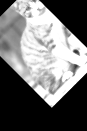

In [27]:
training_image = image1
# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)

#Resize
width = int(test_image.shape[1] * 0.5)
height = int(test_image.shape[0] * 0.5)
dim = (width, height)
resized_image = cv2.resize(test_image, dim, interpolation = cv2.INTER_AREA)

#Shift
shift_x = 20  # shift right by 50 pixels
shift_y = -30  # shift up by 30 pixels

translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

# Apply the translation
translated_image = cv2.warpAffine(resized_image, translation_matrix, (resized_image.shape[1], resized_image.shape[0]))

#Rotate
rows,cols = translated_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_image = cv2.warpAffine(translated_image, rotation_matrix, (cols, rows))

#Brighten Image
bright_img = np.clip(rotated_image * 2.1, 0, 255).astype(np.uint8)
cv2_imshow(bright_img)
test_image = bright_img

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(test_gray)

Number of Keypoints Detected In The Training Image:  1528
Number of Keypoints Detected In The Query Image:  108


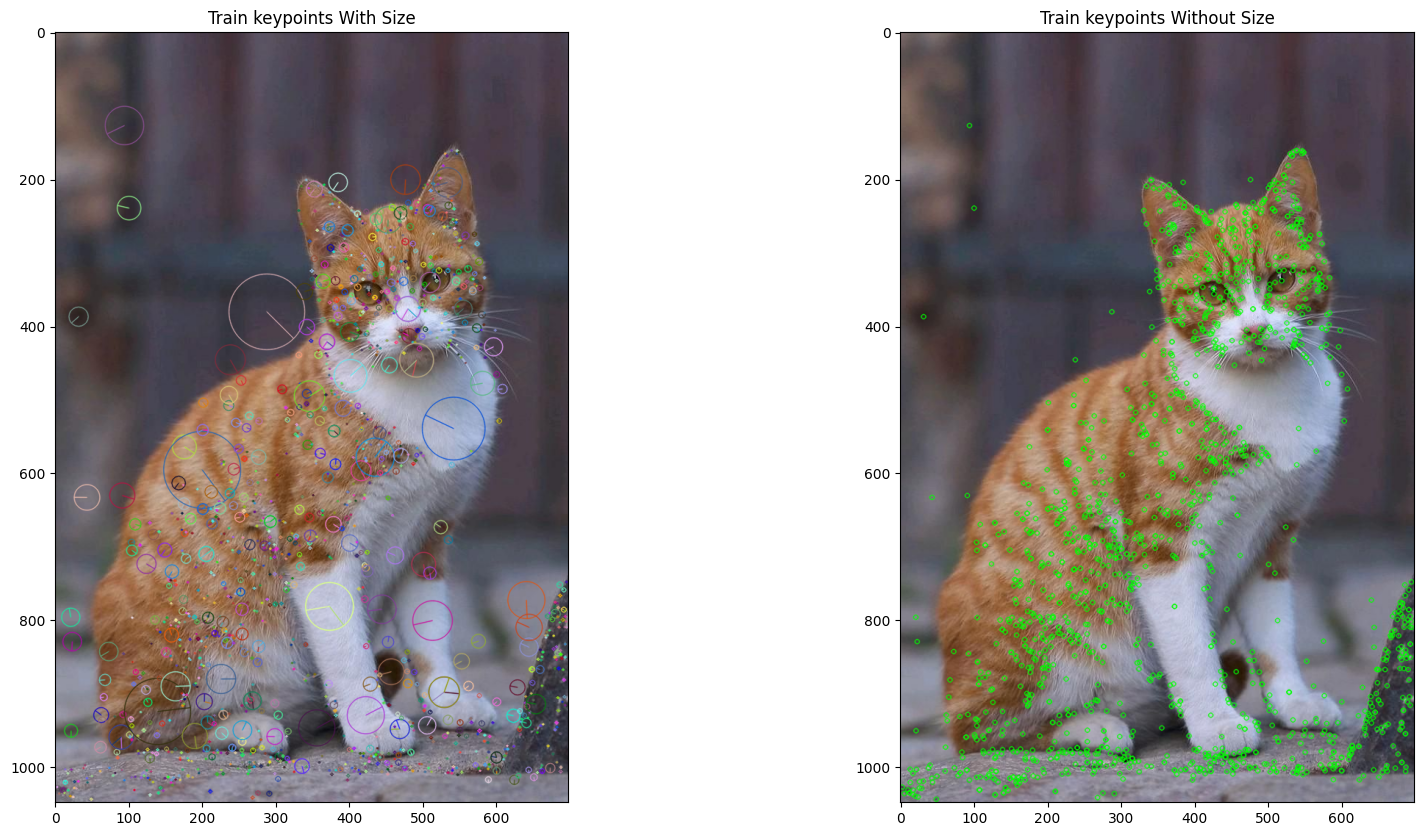

In [12]:
sift = cv2.SIFT_create()

training_image = cv2.cvtColor(training_image, cv2.COLOR_BGR2RGB)

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))



# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))





Number of Keypoints Detected In The Query Image:  108


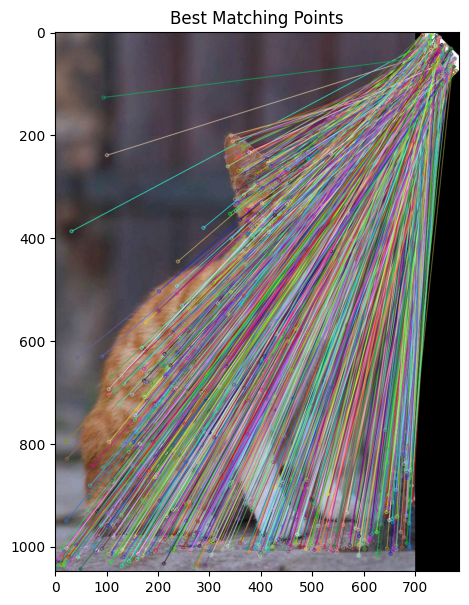


Number of Matching Keypoints Between The Training and Query Images:  1528


In [13]:
# Matching Keypoints

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image

test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

 # Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

Number of Keypoints Detected In The Query Image:  356


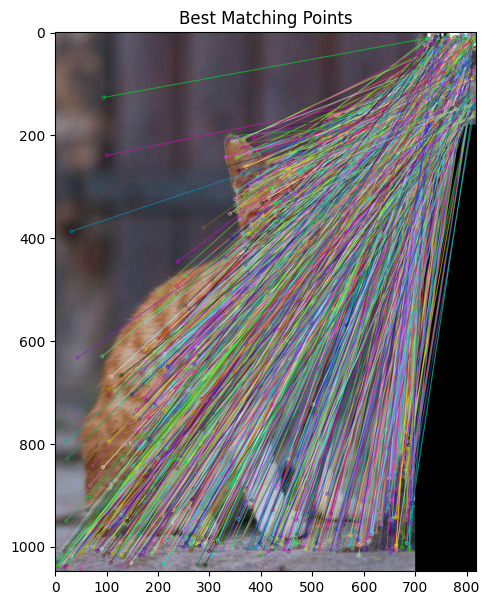


Number of Matching Keypoints Between The Training and Query Images:  1528
Number of Keypoints Detected In The Query Image:  154


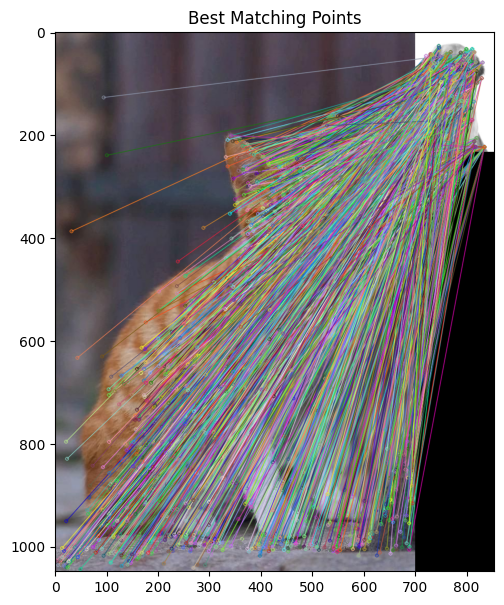


Number of Matching Keypoints Between The Training and Query Images:  1528


In [14]:

# Load the image
cat_img = cv2.imread('cat1.jpeg')
dog_img = cv2.imread('dog.jpeg')


# Convert the training image to gray scale
training_gray_cat = cv2.cvtColor(cat_img, cv2.COLOR_RGB2GRAY)
training_gray_dog = cv2.cvtColor(dog_img, cv2.COLOR_RGB2GRAY)
# Create test image by adding Scale Invariance and Rotational Invariance
test_image_cat = cv2.pyrDown(cat_img)
test_image_cat = cv2.pyrDown(test_image_cat)

test_image_dog = cv2.pyrDown(dog_img)
test_image_dog = cv2.pyrDown(test_image_dog)


test_gray_cat = cv2.cvtColor(test_image_cat, cv2.COLOR_RGB2GRAY)
test_gray_dog = cv2.cvtColor(test_image_dog, cv2.COLOR_RGB2GRAY)

test_keypoints_cat, test_descriptor_cat = sift.detectAndCompute(test_gray_cat, None)
test_keypoints_dog, test_descriptor_dog = sift.detectAndCompute(test_gray_dog, None)

print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints_cat))

# Matching Keypoints

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches1 = bf.match(train_descriptor, test_descriptor_cat)
matches2 = bf.match(train_descriptor, test_descriptor_dog)

# The matches with shorter distance are the ones we want.
matches1 = sorted(matches1, key = lambda x : x.distance)

result_cat = cv2.drawMatches(training_image, train_keypoints, test_gray_cat, test_keypoints_cat, matches1, test_gray_cat, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result_cat)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches1))

print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints_dog))

matches2 = sorted(matches2, key = lambda x : x.distance)

result_dog = cv2.drawMatches(training_image, train_keypoints, test_gray_dog, test_keypoints_dog, matches2, test_gray_dog, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result_dog)
plt.show()
# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches2))

**Short note explaining whether SIFT can handle such a devious disguise.**

In [15]:
'''SIFT identifies keypoints based on texture and shape, not object recognition, so it may match similar features between a cat and a dog,
even if they are different objects.  It doesn’t "understand" the images and relies purely on geometric similarities.
For true object recognition, more advanced models like CNNs are needed.'''

'SIFT identifies keypoints based on texture and shape, not object recognition, so it may match similar features between a cat and a dog,\neven if they are different objects.  It doesn’t "understand" the images and relies purely on geometric similarities.\nFor true object recognition, more advanced models like CNNs are needed.'

# **Task 3**

 **Discuss the role of each layer in the architecture and why VGG-16 uses
small filters (3×3).**

In [ ]:
'''VGG-16 is a deep learning model with a total of 16 layers. It has 13 convolutional layers grouped into five blocks, each extracting features from images.
The first two blocks have 2 convolutional layers each, while the last three blocks have 3 convolutional layers each. These layers detect patterns like edges,
textures, and objects. After feature extraction, 3 fully connected layers classify the images into categories. The design is simple yet powerful, with small
3×3 filters for efficiency and depth. This structure helps VGG-16 achieve excellent performance in image recognition tasks.'''

In [16]:
def harris_corner_detection(image, block_size=2, ksize=3, k=0.04):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    dst = cv2.dilate(dst, None)
    corners = np.zeros_like(image)
    corners[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red
    return corners

In [17]:
X_train = []
y_train = []

# Correct the file names in the list
image_list = [f'image({i}).jpg' for i in range(1, 7)]

for image_name in image_list:
    if image_name.endswith('.jpg'):  # Filter image files
        image = cv2.imread(image_name)

        resized_img = cv2.resize(image, (224, 224))  # Adjust the target size as needed
        corner_image = harris_corner_detection(resized_img)
        X_train.append(corner_image)
        y_train.append(1)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (6, 224, 224, 3)
y_train shape: (6,)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [19]:
def build_cnn_model(input_shape=(224, 224, 3)):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the model
model = build_cnn_model()

# Show summary of the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
y_train = to_categorical(y_train, num_classes=1000)  # num_classes should match your model's output layer
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.0000e+00 - loss: 6.6679 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 -

In [21]:
new_image1 = cv2.imread('test_img.jpg')  # Load the new image

corner_image = harris_corner_detection(new_image1)  # Apply Harris Corner detection
corner_image_resized = cv2.resize(corner_image, (224, 224))  # Resize to the correct input size
corner_image_normalized = corner_image_resized / 255.0  # Normalize pixel values

# Reshape for a batch (the model expects a batch of images)
# Reshape for a batch (the model expects a batch of images)
new_image_batch = np.expand_dims(corner_image_normalized, axis=0)  # Create a batch

# Predict on the new image
prediction = model.predict(new_image_batch)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
Prediction: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


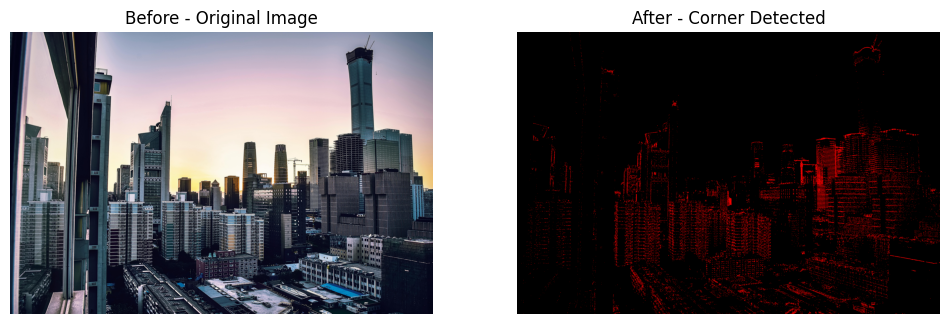

Prediction value: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
# Load and preprocess the test image
test_image_path = 'test_img.jpg'
test_image = cv2.imread(test_image_path)

# Apply Harris Corner Detection
corner_image = harris_corner_detection(test_image)

# Resize and normalize the image (resize to the same size as input to your model)
corner_image_resized = cv2.resize(corner_image, (224, 224))  # Resize to match the training input size (224, 224)
corner_image_normalized = corner_image_resized / 255.0  # Normalize pixel values

# Reshape the image to match the model input (batch size of 1)
test_image_batch = np.expand_dims(corner_image_normalized, axis=0)

# Get the prediction from the model
prediction = model.predict(test_image_batch)

# Convert prediction to class label (assuming binary classification)
prediction_label = 'Corner Detected' if np.any(prediction[0] > 0.5) else 'No Corner Detected'

# Display the before and after images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# "Before" image (Original)
axes[0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axes[0].set_title("Before - Original Image")
axes[0].axis('off')  # Hide axes

# "After" image (With Corner Detection)
axes[1].imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axes[1].set_title(f"After - {prediction_label}")
axes[1].axis('off')  # Hide axes

# Show the plot
plt.show()

# Optionally, display prediction value
print(f"Prediction value: {prediction[0]}")